In [1]:
# построить кубический сплайн для функции, заданной в узлах интерполяции, предполагая, что сплайн имеет нулевую кривизну при 
# х = -2.0 и х = 2.0. Вычислить значение в точке xstar = 0.2
# x = [-2.0, -1.0, 0.0, 1.0, 2.0]; y = [0.13534, 0.36788, 1.0, 2.7183, 7.3891]

In [126]:
import numpy as np 
import matplotlib.pyplot as plt
import math


# A[i] = B[i] = 1  i = 1,n-1 ; A[1]=0, B[n-1]=0 
    # C[i] = 4 ; i = 1,n
    # F[i] = 6*(y[i-1] - 2*y[i] + y[i+1])/h**2     i = 1,n-1
    # x[0] = x[n] = 0
    # c помощью цикла найти a[i+1] = -B[i]/(A[i]*a[i] - C[i]) ; b[i+1] = (F[i] - A[i]*b[i])/(A[i]a[i] + C[i])
    # с учетом первых двух условий a[i+1] = -1/(a[i] - 4) ; b[i+1] = (F[i] - b[i])/(a[i] + 4) i = 1,n-1 ; a[1]=0, b[1]=0
    # x[n] = 0 в процессе обратной прогонки найдем неизвестные x[i] , i = n-1, 1
    # x[i] = a[i+1]*x[i+1] + b[i+1], return x[i] 
    
def sweepmet(y, h, n):  # метод прогонки
    x = [0 for i in range(n)]
    a = [0 for i in range(n)]
    b = [0 for i in range(n)]
    F = [0 for i in range(n)]
    for i in range(1, n-1):
        F[i] = 6*(y[i-1] - 2*y[i] + y[i+1])/h**2 
    for i in range(1, n-1):
        a[i+1] = -1/(a[i] - 4)
    for i in range(1, n-1):
        b[i+1] = (F[i] - b[i])/(a[i] + 4)
    x[n-1] = 0    
    for i in range(n-2, 0, -1):
        x[i] = a[i+1]*x[i+1] + b[i+1] 
    return x

    
    # a[i] = y[i] i = 1,n
    # c[i-1] + 4*c[i] + c[i+1] = 6*(y[i-1] - 2*y[i] + y[i])/h**2 ; i = 1,n-1 ; c[0] = c[n] = 0 методом прогонки(sweep method)
    # d[i] = (c[i] - c[i-1])/h  i = 1,n
    # b[i] = h*c[i]/2 - h**2*d[i]/6 + (y[i] - y[i-1])/h  i = 1,n
    # найти n-1 неизвестные с[i] ,через них найти коэффициенты d[i] и b[i], построить n полиномов                     
    # Sx[i] = a[i] + b[i]*(xstar - x[i]) + (c[i]/2)*(xstar - x[i])**2  +  (d[i]/6)*(xstar - x[i])**3 i = 1, n
def spline(x, y, xstar):
    h = x[1]-x[0]
    n = len(x)
    a = [0]
    d = [0]
    b = [0]
    for i in range(1, n):
        a.append(y[i])  # коэффициеты а равны значениям функции
    c = sweepmet(y, h, n)  # функция метода прогонки, считающая коэффициенты с
    #print("c = ", c)
    for i in range(1, n):
        d.append((c[i] - c[i-1])/h)    # вычисляем коэффициенты d
    for i in range(1, n):
        b.append(h*c[i]/2 - (h**2)*d[i]/6 + (y[i] - y[i-1])/h)  # вычисляем коэффициенты b
    #  построение сплайна все
    #  вычисляем значение в точке
    D = [0,0,0, a, b, c, d]
    for i in range(1, n):
        if (xstar <= x[i]) and (x[i-1] < xstar) :
            D[0] = a[i] + b[i]*(xstar - x[i]) + (c[i]/2)*(xstar - x[i])**2  +  (d[i]/6)*(xstar - x[i])**3
            D[1] = b[i] + c[i]*(xstar - x[i]) + (d[i]/2)*(xstar - x[i])**2
            D[2] = c[i] + d[i]*(xstar - x[i])
    return D
    

x = [-2.0, -1.0, 0.0, 1.0, 2.0]
y = [0.13534, 0.36788, 1.0, 2.7183, 7.3891]
xstar = 2.0
D = spline(x, y, xstar)
print("Значение сплайна в точке", xstar," = ", D[0])
print("Первая производная сплайна в точке", xstar," = ", D[1])
print("Вторая производная сплайна в точке", xstar," = ", D[2])
for i in range(4):
    print("coeff", D[i+3])

Значение сплайна в точке 2.0  =  7.3891
Первая производная сплайна в точке 2.0  =  4.883333823529411
Вторая производная сплайна в точке 2.0  =  0.0
coeff [0, 0.36788, 1.0, 2.7183, 7.3891]
coeff [0, 0.7669894117647058, 1.7711771568627452, 3.5526019607843136, 4.883333823529411]
coeff [0, 1.2025111764705882, 2.412564705882353, 3.8256088235294112, 0]
coeff [0, 0.40083705882352944, 0.4033511764705883, 0.47101470588235267, -1.2752029411764705]


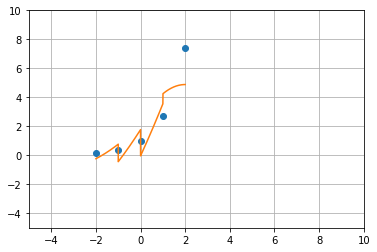

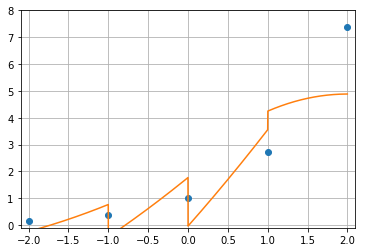

In [116]:
x = [-2.0, -1.0, 0.0, 1.0, 2.0]
y = [0.13534, 0.36788, 1.0, 2.7183, 7.3891]
f_x = np.arange(-1.999,2.0, 0.001) 
f_y = [spline(x, y, i)[1] for i in f_x] 
plt.plot(x, y,'o',f_x,f_y) 
plt.grid(True)
plt.ylim(-5, 10)
plt.xlim(-5,10)
plt.show()
plt.plot(x, y,'o',f_x,f_y) 
plt.grid(True)
plt.ylim(-0.1, 8)
plt.xlim(-2.1,2.1)
plt.show()

In [28]:
n=5
F = [0 for i in range(len(y))]
x = [0 for i in range(n)]
a = [0 for i in range(n)]
b = [0 for i in range(n)]

h = 1
y = [0.13534, 0.36788, 1.0, 2.7183, 7.3891]
for i in range(1, 4):
    F[i] = (6*(y[i-1] - 2*y[i] + y[i+1])/h**2)
for i in range(len(F)):
    print(F[i], end=' ')
for i in range(1, n-1):
    a[i+1] = -1/(a[i] - 4)
for i in range(1, n-1):
    b[i+1] = (F[i] - b[i])/(a[i] + 4) 

print()
for i in range(n):
    print(a[i], end=' ')
print()    
for i in range(n):
    print(b[i], end=' ')
x[n-1] = 0    
for i in range(n-2, 0, -1):
    x[i] = a[i+1]*x[i+1] + b[i+1]
print()    
for i in range(n):
    print(x[i], end=' ')
    
d = [0]
b = [0]
c = x
for i in range(1, n):
    d.append((c[i] - c[i-1])/h)
for i in range(1, n):
    b.append(h*c[i]/2 - (h**2)*d[i]/6 + (y[i] - y[i-1])/h)
    

for i in range(n):
    print(d[i], end=' ')
print("\n----------------")    
for i in range(n):
    print(b[i], end=' ')


0 2.3974800000000003 6.517080000000001 17.714999999999996 0 
0 0 0.25 0.26666666666666666 0.26785714285714285 
0 0 0.5993700000000001 1.3924023529411766 3.8256088235294112 
0 1.2025111764705882 2.412564705882353 3.8256088235294112 0 0 1.2025111764705882 1.210053529411765 1.413044117647058 -3.8256088235294112 
----------------
0 0.6333770588235293 1.6367267647058825 3.3955970588235296 5.308401470588235 